## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   5.398734  1750.940176  0.472774  6.891714  1.567065
1  35.502976   445.777619  0.118692  2.297951  1.091546
2  45.291274   460.126681  0.255467  9.473356  1.144431
3  59.197638  1217.153128  0.537917  1.686719  1.572102
4  74.308614  1331.783757  0.464289  3.048491  1.433153


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.21067 | train_mse: 5.99192 | train_mae: 1.82911 |  0:00:00s
epoch 1  | loss: 0.74152 | train_mse: 3.71316 | train_mae: 1.41909 |  0:00:00s
epoch 2  | loss: 0.55333 | train_mse: 2.6537  | train_mae: 1.17042 |  0:00:00s


epoch 3  | loss: 0.38523 | train_mse: 1.98022 | train_mae: 1.03314 |  0:00:00s
epoch 4  | loss: 0.53371 | train_mse: 1.3959  | train_mae: 0.82091 |  0:00:00s
epoch 5  | loss: 0.56253 | train_mse: 1.07258 | train_mae: 0.67856 |  0:00:00s


epoch 6  | loss: 0.41429 | train_mse: 1.02964 | train_mae: 0.70282 |  0:00:00s
epoch 7  | loss: 0.25243 | train_mse: 1.27767 | train_mae: 0.80048 |  0:00:00s
epoch 8  | loss: 0.33488 | train_mse: 1.52208 | train_mae: 0.8224  |  0:00:00s


epoch 9  | loss: 0.27655 | train_mse: 1.08096 | train_mae: 0.66705 |  0:00:00s
epoch 10 | loss: 0.38786 | train_mse: 0.87294 | train_mae: 0.59021 |  0:00:01s


epoch 11 | loss: 0.30728 | train_mse: 0.55444 | train_mae: 0.53782 |  0:00:01s


epoch 12 | loss: 0.14869 | train_mse: 0.54393 | train_mae: 0.53768 |  0:00:01s
epoch 13 | loss: 0.18722 | train_mse: 0.38556 | train_mae: 0.46629 |  0:00:01s
epoch 14 | loss: 0.22661 | train_mse: 0.42424 | train_mae: 0.46498 |  0:00:01s
epoch 15 | loss: 0.22312 | train_mse: 0.30597 | train_mae: 0.42529 |  0:00:01s


epoch 16 | loss: 0.20653 | train_mse: 0.21089 | train_mae: 0.37404 |  0:00:01s
epoch 17 | loss: 0.19751 | train_mse: 0.19538 | train_mae: 0.35725 |  0:00:01s
epoch 18 | loss: 0.23825 | train_mse: 0.19423 | train_mae: 0.34956 |  0:00:01s


epoch 19 | loss: 0.21496 | train_mse: 0.49637 | train_mae: 0.43771 |  0:00:01s
epoch 20 | loss: 0.31509 | train_mse: 0.53092 | train_mae: 0.45196 |  0:00:02s


epoch 21 | loss: 0.20234 | train_mse: 0.49208 | train_mae: 0.43322 |  0:00:02s
epoch 22 | loss: 0.23723 | train_mse: 0.39851 | train_mae: 0.38379 |  0:00:02s


epoch 23 | loss: 0.23284 | train_mse: 0.43526 | train_mae: 0.36954 |  0:00:02s
epoch 24 | loss: 0.39621 | train_mse: 0.33421 | train_mae: 0.34761 |  0:00:02s
epoch 25 | loss: 0.63714 | train_mse: 0.3393  | train_mae: 0.37843 |  0:00:02s


epoch 26 | loss: 0.32378 | train_mse: 0.39533 | train_mae: 0.43948 |  0:00:02s
epoch 27 | loss: 0.43048 | train_mse: 0.3672  | train_mae: 0.41539 |  0:00:02s
epoch 28 | loss: 0.40246 | train_mse: 0.32303 | train_mae: 0.36485 |  0:00:02s
epoch 29 | loss: 0.33618 | train_mse: 0.33545 | train_mae: 0.35644 |  0:00:02s


epoch 30 | loss: 0.48042 | train_mse: 0.35145 | train_mae: 0.39401 |  0:00:02s
epoch 31 | loss: 0.43363 | train_mse: 0.36097 | train_mae: 0.41022 |  0:00:02s
epoch 32 | loss: 0.41534 | train_mse: 0.36649 | train_mae: 0.41384 |  0:00:03s


epoch 33 | loss: 0.32031 | train_mse: 0.32231 | train_mae: 0.35847 |  0:00:03s
epoch 34 | loss: 0.47791 | train_mse: 0.36442 | train_mae: 0.37243 |  0:00:03s
epoch 35 | loss: 0.4029  | train_mse: 0.31249 | train_mae: 0.34578 |  0:00:03s
epoch 36 | loss: 0.31144 | train_mse: 0.27606 | train_mae: 0.34431 |  0:00:03s


epoch 37 | loss: 0.33255 | train_mse: 0.2666  | train_mae: 0.3428  |  0:00:03s
epoch 38 | loss: 0.31709 | train_mse: 0.25144 | train_mae: 0.33047 |  0:00:03s
epoch 39 | loss: 0.3757  | train_mse: 0.27177 | train_mae: 0.33808 |  0:00:03s
epoch 40 | loss: 0.40835 | train_mse: 0.26612 | train_mae: 0.36781 |  0:00:03s


epoch 41 | loss: 0.46136 | train_mse: 0.20008 | train_mae: 0.34842 |  0:00:03s
epoch 42 | loss: 0.30106 | train_mse: 0.29488 | train_mae: 0.35707 |  0:00:03s
epoch 43 | loss: 0.46484 | train_mse: 0.291   | train_mae: 0.33687 |  0:00:03s
epoch 44 | loss: 0.38849 | train_mse: 0.27995 | train_mae: 0.33513 |  0:00:03s


epoch 45 | loss: 0.41058 | train_mse: 0.28608 | train_mae: 0.34768 |  0:00:03s
epoch 46 | loss: 0.30733 | train_mse: 0.30155 | train_mae: 0.36805 |  0:00:03s
epoch 47 | loss: 0.31808 | train_mse: 0.27409 | train_mae: 0.34067 |  0:00:04s


epoch 48 | loss: 0.35607 | train_mse: 0.30575 | train_mae: 0.31651 |  0:00:04s
epoch 49 | loss: 0.60472 | train_mse: 0.30169 | train_mae: 0.3285  |  0:00:04s
epoch 50 | loss: 0.31227 | train_mse: 0.29816 | train_mae: 0.34219 |  0:00:04s
epoch 51 | loss: 0.16223 | train_mse: 0.27354 | train_mae: 0.32407 |  0:00:04s


epoch 52 | loss: 0.13554 | train_mse: 0.12679 | train_mae: 0.2887  |  0:00:04s
epoch 53 | loss: 0.12129 | train_mse: 0.12556 | train_mae: 0.28873 |  0:00:04s
epoch 54 | loss: 0.12094 | train_mse: 0.14852 | train_mae: 0.3018  |  0:00:04s
epoch 55 | loss: 0.16818 | train_mse: 0.13112 | train_mae: 0.28195 |  0:00:04s


epoch 56 | loss: 0.19719 | train_mse: 0.10738 | train_mae: 0.2649  |  0:00:04s
epoch 57 | loss: 0.36734 | train_mse: 0.09249 | train_mae: 0.24673 |  0:00:04s
epoch 58 | loss: 0.22598 | train_mse: 0.10259 | train_mae: 0.25791 |  0:00:04s


epoch 59 | loss: 0.20188 | train_mse: 0.10013 | train_mae: 0.24908 |  0:00:04s
epoch 60 | loss: 0.44368 | train_mse: 0.10785 | train_mae: 0.25774 |  0:00:05s
epoch 61 | loss: 0.13227 | train_mse: 0.09324 | train_mae: 0.23101 |  0:00:05s


epoch 62 | loss: 0.1665  | train_mse: 0.13429 | train_mae: 0.26185 |  0:00:05s
epoch 63 | loss: 0.22962 | train_mse: 0.11202 | train_mae: 0.27184 |  0:00:05s
epoch 64 | loss: 0.20328 | train_mse: 0.1223  | train_mae: 0.2869  |  0:00:05s


epoch 65 | loss: 0.12003 | train_mse: 0.13467 | train_mae: 0.30407 |  0:00:05s
epoch 66 | loss: 0.1336  | train_mse: 0.13316 | train_mae: 0.30199 |  0:00:05s
epoch 67 | loss: 0.16914 | train_mse: 0.1438  | train_mae: 0.30034 |  0:00:05s


epoch 68 | loss: 0.17143 | train_mse: 0.1668  | train_mae: 0.30602 |  0:00:05s
epoch 69 | loss: 0.27821 | train_mse: 0.14279 | train_mae: 0.28217 |  0:00:05s
epoch 70 | loss: 0.23897 | train_mse: 0.12593 | train_mae: 0.2743  |  0:00:05s


epoch 71 | loss: 0.42394 | train_mse: 0.14801 | train_mae: 0.27643 |  0:00:05s
epoch 72 | loss: 0.50374 | train_mse: 0.16322 | train_mae: 0.27212 |  0:00:05s
epoch 73 | loss: 0.32651 | train_mse: 0.243   | train_mae: 0.3285  |  0:00:06s


epoch 74 | loss: 0.26418 | train_mse: 0.26468 | train_mae: 0.35257 |  0:00:06s
epoch 75 | loss: 0.37646 | train_mse: 0.27915 | train_mae: 0.347   |  0:00:06s
epoch 76 | loss: 0.14389 | train_mse: 0.22319 | train_mae: 0.30392 |  0:00:06s


epoch 77 | loss: 0.3501  | train_mse: 0.15706 | train_mae: 0.2834  |  0:00:06s
epoch 78 | loss: 0.21237 | train_mse: 0.15741 | train_mae: 0.27909 |  0:00:06s


epoch 79 | loss: 0.17915 | train_mse: 0.17719 | train_mae: 0.29734 |  0:00:06s
epoch 80 | loss: 0.25278 | train_mse: 0.24283 | train_mae: 0.30913 |  0:00:06s
epoch 81 | loss: 0.29104 | train_mse: 0.15233 | train_mae: 0.29065 |  0:00:06s
epoch 82 | loss: 0.21025 | train_mse: 0.1792  | train_mae: 0.29504 |  0:00:06s


epoch 83 | loss: 0.23961 | train_mse: 0.15116 | train_mae: 0.26979 |  0:00:06s
epoch 84 | loss: 0.22737 | train_mse: 0.12377 | train_mae: 0.26395 |  0:00:06s
epoch 85 | loss: 0.10943 | train_mse: 0.10718 | train_mae: 0.24899 |  0:00:07s
epoch 86 | loss: 0.43752 | train_mse: 0.14062 | train_mae: 0.27548 |  0:00:07s


epoch 87 | loss: 0.16502 | train_mse: 0.17236 | train_mae: 0.2959  |  0:00:07s
epoch 88 | loss: 0.12665 | train_mse: 0.12168 | train_mae: 0.26762 |  0:00:07s
epoch 89 | loss: 0.09479 | train_mse: 0.09661 | train_mae: 0.2522  |  0:00:07s
epoch 90 | loss: 0.1552  | train_mse: 0.10496 | train_mae: 0.25546 |  0:00:07s


epoch 91 | loss: 0.13262 | train_mse: 0.12503 | train_mae: 0.26891 |  0:00:07s
epoch 92 | loss: 0.48393 | train_mse: 0.16232 | train_mae: 0.29758 |  0:00:07s
epoch 93 | loss: 0.13524 | train_mse: 0.11656 | train_mae: 0.25871 |  0:00:07s
epoch 94 | loss: 0.16913 | train_mse: 0.11906 | train_mae: 0.26405 |  0:00:07s


epoch 95 | loss: 0.13494 | train_mse: 0.15816 | train_mae: 0.29731 |  0:00:07s
epoch 96 | loss: 0.1528  | train_mse: 0.19767 | train_mae: 0.32609 |  0:00:07s
epoch 97 | loss: 0.18674 | train_mse: 0.15321 | train_mae: 0.29776 |  0:00:07s
epoch 98 | loss: 0.21501 | train_mse: 0.10373 | train_mae: 0.2512  |  0:00:07s


epoch 99 | loss: 0.17167 | train_mse: 0.13024 | train_mae: 0.25804 |  0:00:07s
epoch 100| loss: 0.16769 | train_mse: 0.08736 | train_mae: 0.23068 |  0:00:08s
epoch 101| loss: 0.13544 | train_mse: 0.09183 | train_mae: 0.25026 |  0:00:08s
epoch 102| loss: 0.21514 | train_mse: 0.14462 | train_mae: 0.26328 |  0:00:08s


epoch 103| loss: 0.12158 | train_mse: 0.15871 | train_mae: 0.24739 |  0:00:08s
epoch 104| loss: 0.21285 | train_mse: 0.11433 | train_mae: 0.23619 |  0:00:08s
epoch 105| loss: 0.08914 | train_mse: 0.09187 | train_mae: 0.23611 |  0:00:08s
epoch 106| loss: 0.17123 | train_mse: 0.10345 | train_mae: 0.24948 |  0:00:08s


epoch 107| loss: 0.16097 | train_mse: 0.09008 | train_mae: 0.23225 |  0:00:08s
epoch 108| loss: 0.1589  | train_mse: 0.14595 | train_mae: 0.28825 |  0:00:08s
epoch 109| loss: 0.15091 | train_mse: 0.14256 | train_mae: 0.2797  |  0:00:08s
epoch 110| loss: 0.23672 | train_mse: 0.30171 | train_mae: 0.28449 |  0:00:08s


epoch 111| loss: 0.16354 | train_mse: 0.28179 | train_mae: 0.27364 |  0:00:08s
epoch 112| loss: 0.18283 | train_mse: 0.29679 | train_mae: 0.31697 |  0:00:08s
epoch 113| loss: 0.18414 | train_mse: 0.3026  | train_mae: 0.34497 |  0:00:08s


epoch 114| loss: 0.36803 | train_mse: 0.10536 | train_mae: 0.26465 |  0:00:08s
epoch 115| loss: 0.24208 | train_mse: 0.30882 | train_mae: 0.33076 |  0:00:09s
epoch 116| loss: 0.68355 | train_mse: 0.34906 | train_mae: 0.30746 |  0:00:09s
epoch 117| loss: 0.43162 | train_mse: 0.21135 | train_mae: 0.30437 |  0:00:09s


epoch 118| loss: 0.40194 | train_mse: 0.20153 | train_mae: 0.31923 |  0:00:09s
epoch 119| loss: 0.37358 | train_mse: 0.24358 | train_mae: 0.34232 |  0:00:09s
epoch 120| loss: 0.33341 | train_mse: 0.23682 | train_mae: 0.33871 |  0:00:09s
epoch 121| loss: 0.31377 | train_mse: 0.18606 | train_mae: 0.30861 |  0:00:09s


epoch 122| loss: 0.40273 | train_mse: 0.2159  | train_mae: 0.34195 |  0:00:09s
epoch 123| loss: 0.13717 | train_mse: 0.19834 | train_mae: 0.32669 |  0:00:09s
epoch 124| loss: 0.22389 | train_mse: 0.15892 | train_mae: 0.28821 |  0:00:09s
epoch 125| loss: 0.28948 | train_mse: 0.13682 | train_mae: 0.27088 |  0:00:09s


epoch 126| loss: 0.28233 | train_mse: 0.12437 | train_mae: 0.26174 |  0:00:09s
epoch 127| loss: 0.15972 | train_mse: 0.11029 | train_mae: 0.25717 |  0:00:09s
epoch 128| loss: 0.17895 | train_mse: 0.10155 | train_mae: 0.25419 |  0:00:09s


epoch 129| loss: 0.16386 | train_mse: 0.19408 | train_mae: 0.29257 |  0:00:09s
epoch 130| loss: 0.26244 | train_mse: 0.18186 | train_mae: 0.28452 |  0:00:10s
epoch 131| loss: 0.22771 | train_mse: 0.14455 | train_mae: 0.26078 |  0:00:10s
epoch 132| loss: 0.15994 | train_mse: 0.11444 | train_mae: 0.25223 |  0:00:10s
epoch 133| loss: 0.23376 | train_mse: 0.12544 | train_mae: 0.25958 |  0:00:10s


epoch 134| loss: 0.18926 | train_mse: 0.15314 | train_mae: 0.28795 |  0:00:10s
epoch 135| loss: 0.1135  | train_mse: 0.20363 | train_mae: 0.33212 |  0:00:10s
epoch 136| loss: 0.14871 | train_mse: 0.15155 | train_mae: 0.29062 |  0:00:10s
epoch 137| loss: 0.22811 | train_mse: 0.12529 | train_mae: 0.2616  |  0:00:10s


epoch 138| loss: 0.14695 | train_mse: 0.12538 | train_mae: 0.24491 |  0:00:10s
epoch 139| loss: 0.22766 | train_mse: 0.13097 | train_mae: 0.26611 |  0:00:10s
epoch 140| loss: 0.44466 | train_mse: 0.17349 | train_mae: 0.3011  |  0:00:10s
epoch 141| loss: 0.23986 | train_mse: 0.12893 | train_mae: 0.26733 |  0:00:10s


epoch 142| loss: 0.19046 | train_mse: 0.09508 | train_mae: 0.24995 |  0:00:10s
epoch 143| loss: 0.22513 | train_mse: 0.15729 | train_mae: 0.2925  |  0:00:10s
epoch 144| loss: 0.20492 | train_mse: 0.17181 | train_mae: 0.32444 |  0:00:10s


epoch 145| loss: 0.27249 | train_mse: 0.18384 | train_mae: 0.32533 |  0:00:11s
epoch 146| loss: 0.15902 | train_mse: 0.14812 | train_mae: 0.30093 |  0:00:11s
epoch 147| loss: 0.1615  | train_mse: 0.10719 | train_mae: 0.26316 |  0:00:11s
epoch 148| loss: 0.1377  | train_mse: 0.09353 | train_mae: 0.24696 |  0:00:11s


epoch 149| loss: 0.19359 | train_mse: 0.10518 | train_mae: 0.25432 |  0:00:11s
epoch 150| loss: 0.30758 | train_mse: 0.15037 | train_mae: 0.28157 |  0:00:11s

Early stopping occurred at epoch 150 with best_epoch = 100 and best_train_mae = 0.23068
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

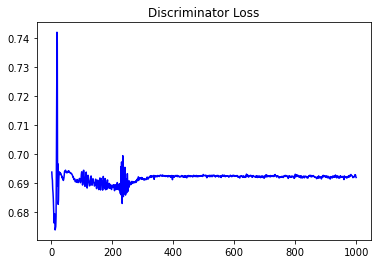

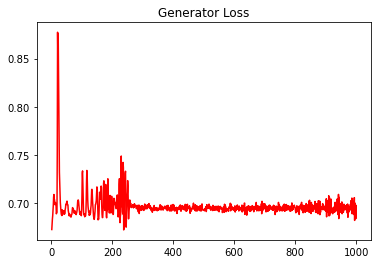

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3841955067586159


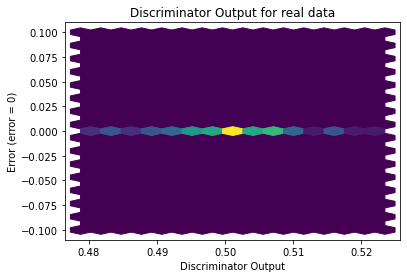

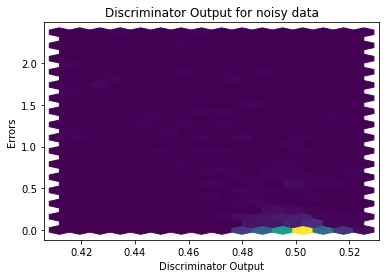

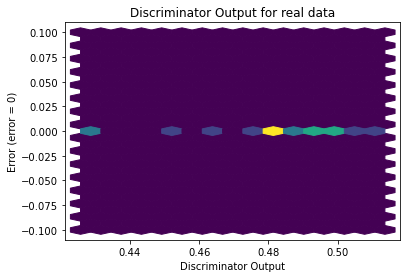

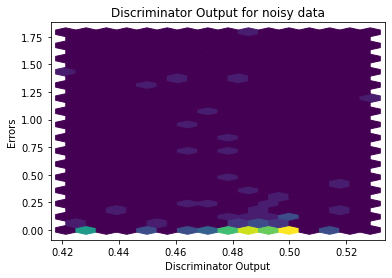

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


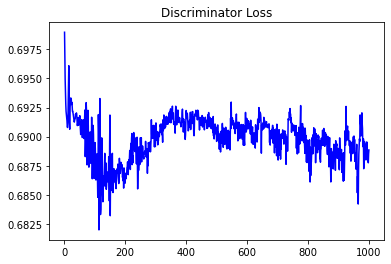

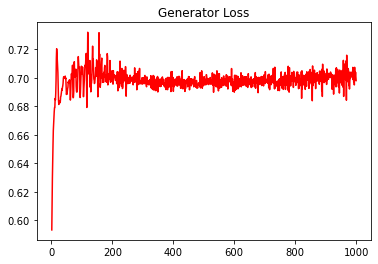

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.43539578525265804


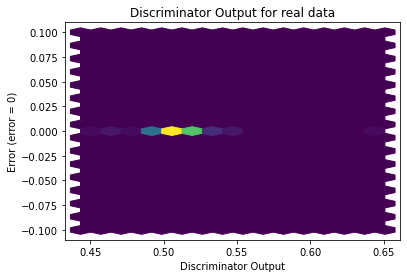

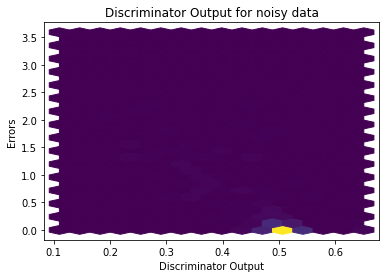

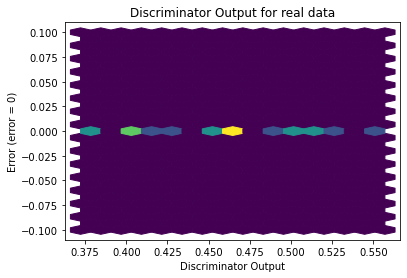

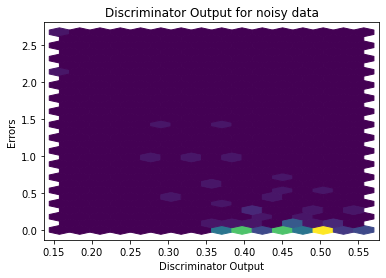

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2832]], requires_grad=True)
